In [1]:
import xml.etree.ElementTree as ET
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np

In [2]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    boxA=(min(boxA[0],boxA[1]),min(boxA[2],boxA[3]),max(boxA[0],boxA[1]),max(boxA[2],boxA[3]))
    boxB=(min(boxB[0],boxB[1]),min(boxB[2],boxB[3]),max(boxB[0],boxB[1]),max(boxB[2],boxB[3]))
    
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = (xB - xA)*(yB - yA)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea/float(boxAArea + boxBArea - interArea)
    
    # return the intersection over union value
    return iou

In [3]:
realboxes=[]
root = ET.parse('SEM NPs/Au 212/fragm 180/fragm180_3.xml').getroot()
xmin=[]
xmax=[]
ymin=[]
ymax=[]
for child in root:
    if child.tag=='object':
        xmin.append(int(child.find('bndbox').find('xmin').text))
        xmax.append(int(child.find('bndbox').find('xmax').text))
        ymin.append(int(child.find('bndbox').find('ymin').text))
        ymax.append(int(child.find('bndbox').find('ymax').text))
for box in zip(xmin, xmax, ymin, ymax):
    realboxes.append(box)

In [4]:
autoboxes=pd.read_csv('SEM NPs/Au 212/fragm 180/Au212_180_autobboxes.csv_boxes.csv', names=['xmin','ymin','xmax','ymax'])

In [5]:
autoboxes=pd.read_csv('SEM NPs/Au 212/fragm 180/test.csv_boxes.csv',names=['xmin','ymin','xmax','ymax'])

In [6]:
def right(box1, box2):
    #print(bb_intersection_over_union(box1, box2))
    if  bb_intersection_over_union(box1, box2)>0.7:
        return 0
    else:
        return 1

In [7]:
Hits=0
Falsepos=0
Falseneg=0
for realbox in realboxes:
    Ans=1
    for i, detectedbox in autoboxes.iterrows():
        detectedbox=detectedbox.astype(int)
        detectedbox=(detectedbox['xmin'],detectedbox['xmax'],detectedbox['ymin'],detectedbox['ymax'])
        Ans=Ans*right(realbox, detectedbox)
        if Ans==0:
            Hits=Hits+1
            break
    if Ans!=0:
        Falsepos=Falsepos+1

for i, detectedbox in autoboxes.iterrows():
    Ans=1
    detectedbox=detectedbox.astype(int)
    detectedbox=(detectedbox['xmin'],detectedbox['xmax'],detectedbox['ymin'],detectedbox['ymax'])
    for realbox in realboxes:
        Ans=Ans*right(realbox, detectedbox)
        if Ans==0:
            Hits=Hits+1
            break
    if Ans!=0:
        Falseneg=Falseneg+1

In [8]:
Hits//2

146

In [9]:
Falsepos

22

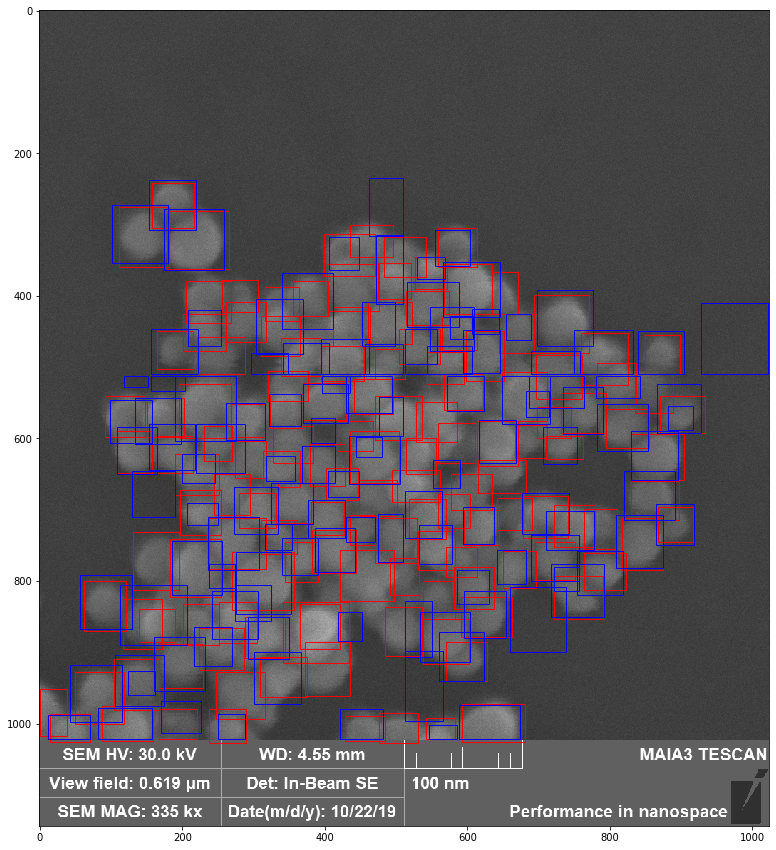

In [27]:
# Create figure and axes
image = mpimg.imread('SEM NPs/Au 212/fragm 180/3.tif')
image=np.stack([image,image,image], axis=-1)/65535
fig,ax = plt.subplots(1, figsize=(15,15))

# Display the image
ax.imshow(image)
# Create a Rectangle patch
for box in realboxes:
    rect = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
for i, box in autoboxes.iterrows():
    if i<1000 and box[2]-box[0]<50 and box[3]-box[1]<50 and box[2]-box[0]>15 and box[2]-box[0]>15 :
        box=box.astype(int)*2
        rect = patches.Rectangle((box['xmin'],box['ymin']),box['xmax']-box['xmin'],box['ymax']-box['ymin'],linewidth=1,edgecolor='b',facecolor='none')
        ax.add_patch(rect)
plt.show()

In [15]:
Xsez=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
Ytrain=[3.1836, 2.4492, 2.079, 2.3596, 2.0087, 2.3555, 2.1875, 1.8843, 2.0255, 1.9355, 1.8654, 1.7796, 1.7073, 1.6441, 1.612, 1.5623, 1.5434]
Yval=[9.667, 2.9732, 2.5647, 2.3814, 2.2647, 2.1653, 2.096, 2.04, 1.993, 1.7192, 1.7555, 2.5592, 1.7332, 1.2287, 1.7643, 2.0252, 1.2762]

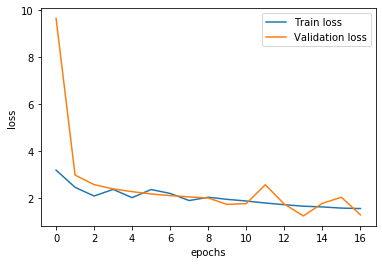

In [18]:
plt.plot(Ytrain,label='Train loss')
plt.plot(Yval, label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [12]:
realboxes[0]

(157, 216, 241, 305)